In [1]:
import tensorflow as tf

In [2]:
#from google.colab import drive
#drive.mount('/content/gdrive')

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras import optimizers

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
print(tf.__version__)

2.3.0


In [5]:
df = pd.read_csv("bank.csv")

In [6]:
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [7]:
df.shape

(10000, 14)

In [8]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [11]:
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

# Target Variable is "IsActiveMember" due to we have to predictive wether the customer is going to continue or not.


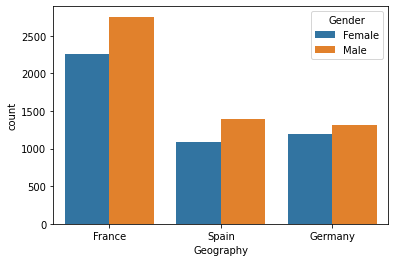

In [12]:
ax = sns.countplot(x="Geography", hue="Gender", data=df)

In [13]:
df1 = df

In [14]:
df1.drop(columns = {"RowNumber","CustomerId",	"Surname"} , inplace = True  )

#Removing Variables where are all unique Values.


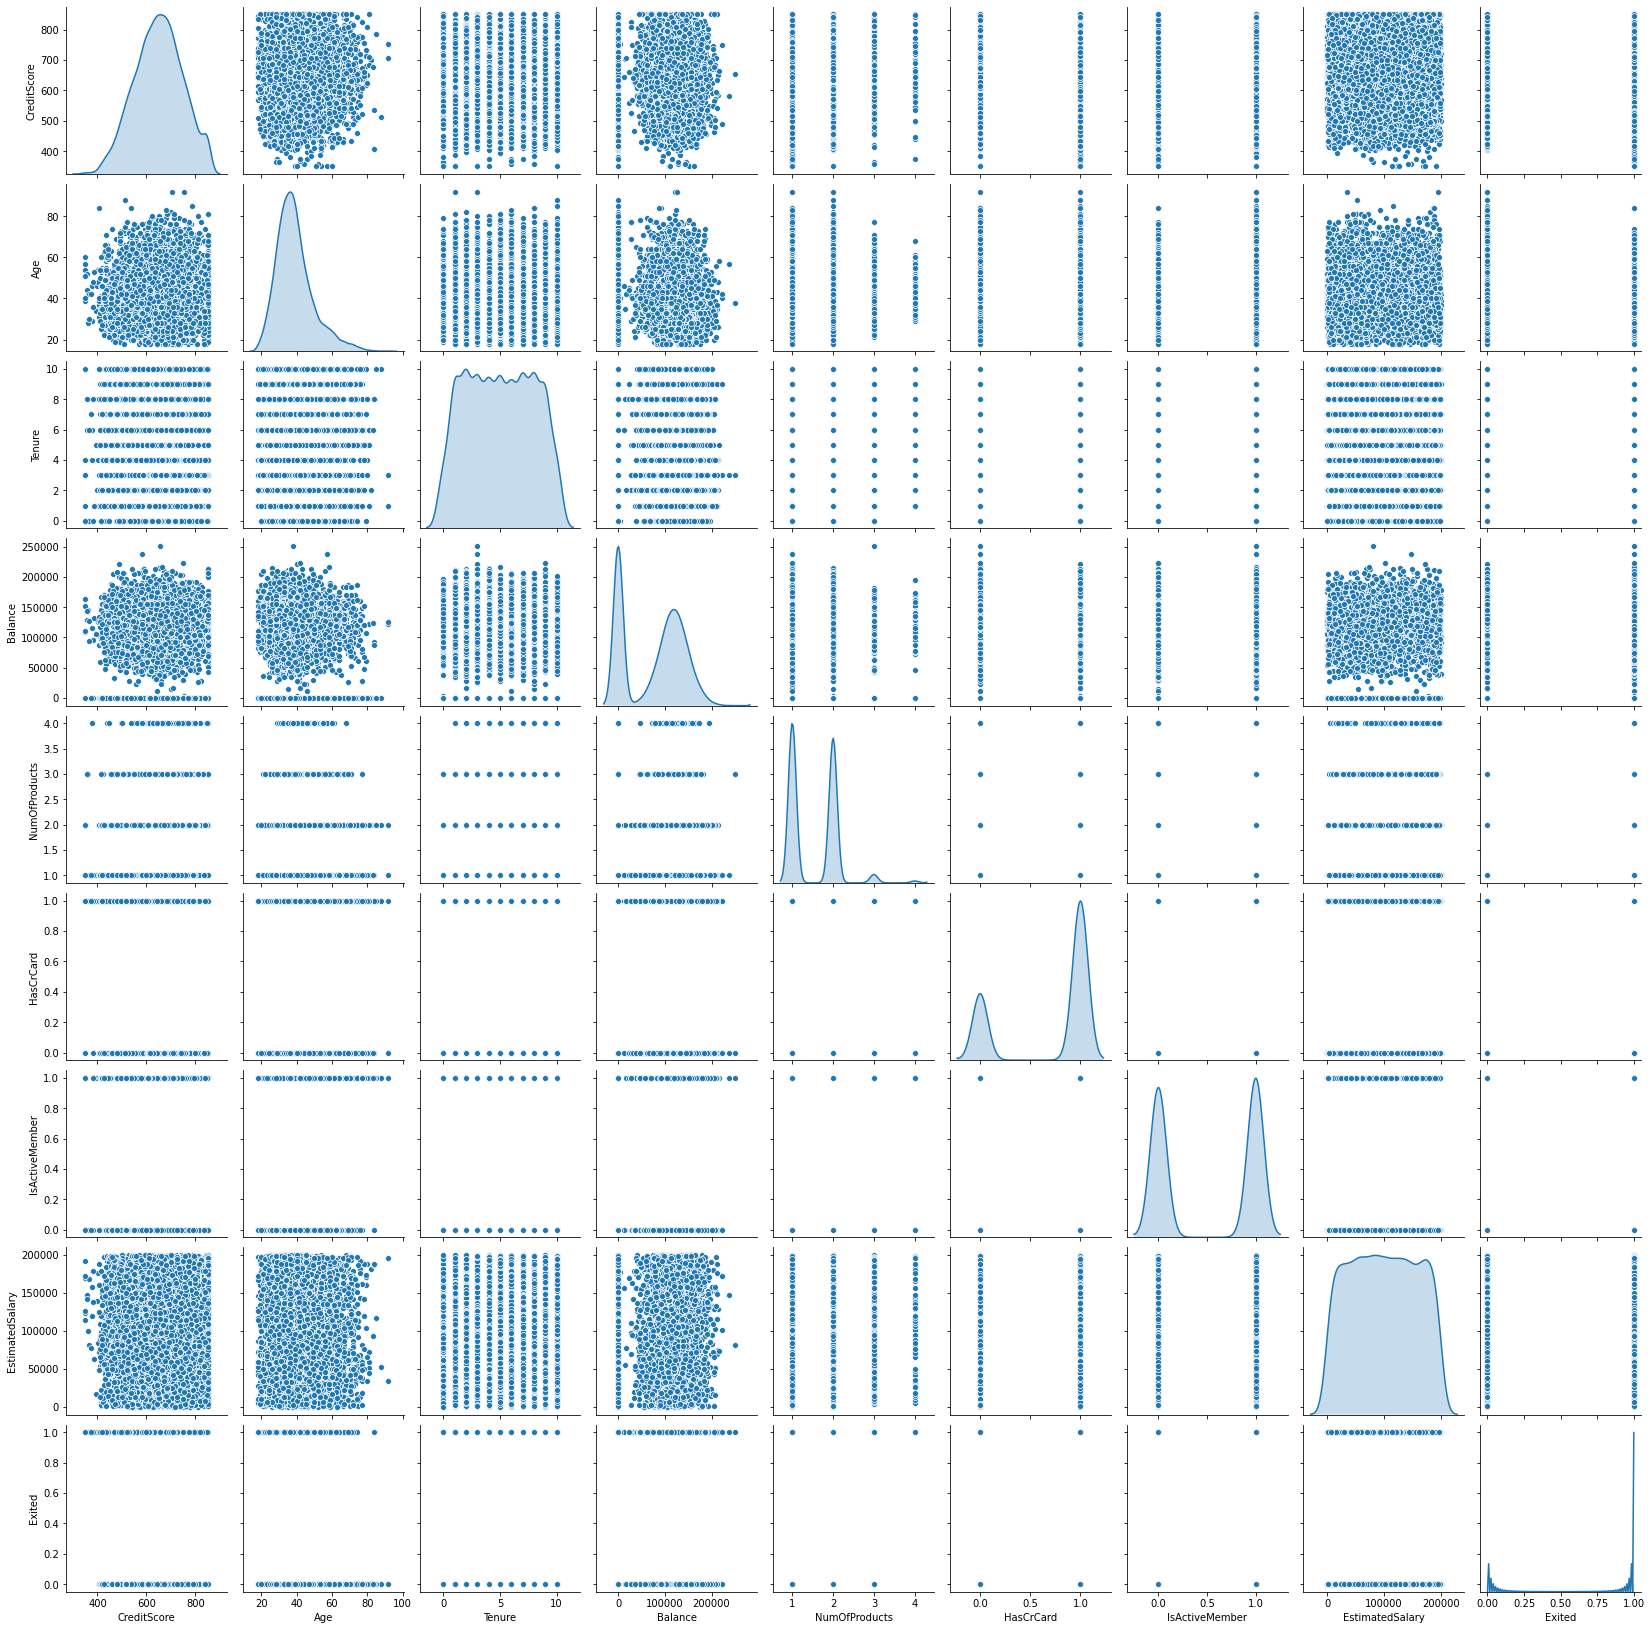

In [15]:
import seaborn as sns
sns.pairplot(df1, diag_kind='kde') 

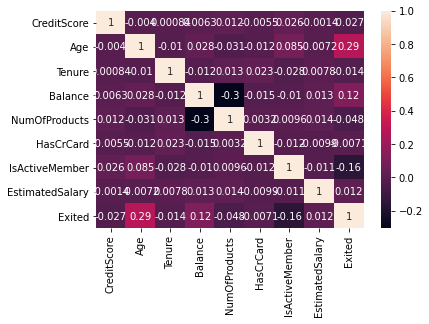

In [16]:
corr = df1.corr()
sns.heatmap(corr, annot = True)

#There is not linerar strong correlation from the variable "IsActiveMember" vs other variable strongest Linear correlation is 0.29 with Age.


In [17]:
df2 = df1 

In [18]:
df2_dummies= pd.get_dummies(df2, prefix='Geo', columns=['Geography'])
df2_dummies

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geo_France,Geo_Germany,Geo_Spain
0,619,Female,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,Female,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,Female,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,Female,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,Female,43,2,125510.82,1,1,1,79084.10,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,Male,39,5,0.00,2,1,0,96270.64,0,1,0,0
9996,516,Male,35,10,57369.61,1,1,1,101699.77,0,1,0,0
9997,709,Female,36,7,0.00,1,0,1,42085.58,1,1,0,0
9998,772,Male,42,3,75075.31,2,1,0,92888.52,1,0,1,0


In [19]:
df3_dummies= pd.get_dummies(df2_dummies, prefix='Gen', columns=['Gender'])
df3_dummies

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geo_France,Geo_Germany,Geo_Spain,Gen_Female,Gen_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,1,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,1,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,1,0,0,1,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1,0,0,1


In [20]:
df3 = df3_dummies

In [21]:
df3.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
NumOfProducts,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
HasCrCard,10000.0,0.705500,0.455840,0.00,0.00,1.000,1.0000,1.00
IsActiveMember,10000.0,0.515100,0.499797,0.00,0.00,1.000,1.0000,1.00
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48
Exited,10000.0,0.203700,0.402769,0.00,0.00,0.000,0.0000,1.00
Geo_France,10000.0,0.501400,0.500023,0.00,0.00,1.000,1.0000,1.00


In [22]:
#prop_y = df3['IsActiveMember'].value_counts(normalize=True)

In [23]:
df4 = df3

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X = df4.drop("IsActiveMember", axis = 1  )
y = df4.pop("IsActiveMember")

In [26]:
y.value_counts(normalize=True)*100

1    51.51
0    48.49
Name: IsActiveMember, dtype: float64

# Data set is balanced, is almost 50% - 50%


> Indented block





In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 7)

In [28]:
y.shape

(10000,)

In [29]:
X_train = preprocessing.normalize(X_train)

In [30]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8000, 13)
(2000, 13)
(8000,)
(2000,)


In [31]:
from sklearn.preprocessing import StandardScaler


In [32]:
##scaler = StandardScaler().fit(X_train)
#X_train = scaler.transform(X_train)
#X_test = scaler.transform(X_test)

# Scaling the data


In [53]:
model = Sequential()

In [54]:
from tensorflow import keras

In [55]:
model.add(Dense(128, input_shape = (13,), activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(32, activation = 'tanh'))
model.add(Dense(1, activation = 'sigmoid'))
#keras.layers.Dropout(rate=0.0)

In [56]:
sgd = optimizers.Adam(lr = 0.001)

In [57]:
model.compile(optimizer = sgd, loss = 'BinaryCrossentropy', metrics=['accuracy'])

##optimize the loss function, optimizer, learning rate, and epoch and also model layers.


In [58]:
model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 128)               1792      
_________________________________________________________________
dense_9 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_10 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 33        
Total params: 12,161
Trainable params: 12,161
Non-trainable params: 0
_________________________________________________________________


In [59]:
model.fit(X_train, y_train.values, batch_size = 300, epochs = 200, verbose = 1)


Epoch 1/200
27/27 [==============================] - 0s 2ms/step - loss: 0.6937 - accuracy: 0.5096
Epoch 2/200
27/27 [==============================] - 0s 2ms/step - loss: 0.6933 - accuracy: 0.5013
Epoch 3/200
27/27 [==============================] - 0s 2ms/step - loss: 0.6929 - accuracy: 0.5180
Epoch 4/200
27/27 [==============================] - 0s 3ms/step - loss: 0.6927 - accuracy: 0.5180
Epoch 5/200
27/27 [==============================] - 0s 2ms/step - loss: 0.6926 - accuracy: 0.5180
Epoch 6/200
27/27 [==============================] - 0s 2ms/step - loss: 0.6926 - accuracy: 0.5180
Epoch 7/200
27/27 [==============================] - 0s 3ms/step - loss: 0.6928 - accuracy: 0.5171
Epoch 8/200
27/27 [==============================] - 0s 2ms/step - loss: 0.6928 - accuracy: 0.5180
Epoch 9/200
27/27 [==============================] - 0s 2ms/step - loss: 0.6925 - accuracy: 0.5180
Epoch 10/200
27/27 [==============================] - 0s 2ms/step - loss: 0.6925 - accuracy: 0.5180
Epoch 11/

In [40]:
#hist  = pd.DataFrame(history.history)
#hist['epoch'] = history.epoch

In [41]:
X_test = preprocessing.normalize(X_test)

In [42]:
results = model.evaluate(X_test, y_test.values)


63/63 [==============================] - 0s 1ms/step - loss: 0.6943 - accuracy: 0.5025


In [43]:
print(model.metrics_names)
print(results)  

['loss', 'accuracy']
[0.694258987903595, 0.5024999976158142]


In [44]:
Y_pred_cls = model.predict_classes(X_test, batch_size=700, verbose=0)
print('Accuracy Model1 (Dropout): '+ str(model.evaluate(X_test,y_test.values)[1]))
print('Recall_score: ' + str(recall_score(y_test.values,Y_pred_cls)))
print('Precision_score: ' + str(precision_score(y_test.values, Y_pred_cls)))
print('F-score: ' + str(f1_score(y_test.values,Y_pred_cls)))
confusion_matrix(y_test.values, Y_pred_cls)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
63/63 [==============================] - 0s 1ms/step - loss: 0.6943 - accuracy: 0.5025
Accuracy Model1 (Dropout): 0.5024999976158142
Recall_score: 0.9890764647467726
Precision_score: 0.503030303030303
F-score: 0.6668898560428523


array([[  9, 984],
       [ 11, 996]])

According to this results Recall is the Metric because the bank does not want to loose a coustomer by predicting is not going to leave when actually is going to do it.